In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [54]:
clust_data=pd.read_csv("data_with_additional_columns.csv",index_col=0)

In [2]:
clust_data=pd.read_excel("data_with_additional_columns.xlsx",index_col=0)

In [3]:
clust_data.isnull().sum()

ID                      0
genres                  0
titles                  0
cities                  0
segment                 0
                    ...  
3                  158699
4                  162982
mean_genre_time         0
mean_title_time         0
mean_city_time          0
Length: 74, dtype: int64

In [4]:
clust_data.drop(clust_data[clust_data['prefered_genre'].isnull()].index,inplace=True)

In [5]:
clust_data.fillna(0,inplace=True)

In [6]:
clust_data.isnull().sum()

ID                 0
genres             0
titles             0
cities             0
segment            0
                  ..
3                  0
4                  0
mean_genre_time    0
mean_title_time    0
mean_city_time     0
Length: 74, dtype: int64

In [8]:
clust=clust_data.copy()

In [9]:
clust=clust.drop(['ID','genres','titles','cities','segment','tod','dow','gen','%time_prefered_genre','prefered_genre'],axis=1)

In [10]:
clust.drop('most_watched_pgm',axis=1,inplace=True)

In [11]:
clust_data_dummy=pd.get_dummies(clust,drop_first=True)
clust_data_dummy

,prime_time,prime_day,Drama,Cricket,Others,Family,Crime,Romance,Action,Comedy,...,5,3,4,mean_genre_time,mean_title_time,mean_city_time,watch_pattern_morning,watch_pattern_night,watch_frequency_Frequent watcher,watch_frequency_Medium watcher
0,21,4,0.168824,97.608329,2.222847,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,1184.666667,394.777778,1778.000000,0,0,0,1
1,2,7,58.525533,0.000000,0.000000,11.869149,2.272917,19.813001,2.467807,5.051592,...,0.000000,0.00000,0.0,13939.500000,2534.000000,41827.500000,0,0,0,0
2,9,5,71.001429,19.440098,0.000000,9.446221,0.000000,0.000000,0.047622,0.051024,...,0.000000,0.00000,0.0,4899.666667,1729.117647,29400.000000,1,0,0,0
3,16,2,2.988731,95.124939,0.000000,0.000000,0.000000,1.886330,0.000000,0.000000,...,0.000000,0.00000,0.0,1360.666667,1360.666667,1360.666667,0,0,0,1
4,22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,8529.000000,8529.000000,2842.666667,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175215,21,7,0.000000,98.517170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,1922.000000,225.705882,1921.500000,0,0,1,0
175216,21,7,0.000000,72.774342,0.000000,0.000000,26.923630,0.000000,0.000000,0.000000,...,0.000000,2.64672,0.0,2317.666667,695.100000,3477.000000,0,0,0,1
175217,14,2,99.972479,0.000000,0.000000,0.027521,0.000000,0.000000,0.000000,0.000000,...,6.054649,0.00000,0.0,12717.500000,6358.750000,25436.000000,1,0,0,0
175218,13,2,99.982269,0.000000,0.000000,0.000000,0.000000,0.017731,0.000000,0.000000,...,0.000000,0.00000,0.0,25379.000000,10151.200000,16918.333333,0,0,0,0


In [12]:
clust_data_scaled = pd.DataFrame(StandardScaler().fit_transform(clust_data_dummy),columns=clust_data_dummy.columns)
clust_data_scaled.head()

,prime_time,prime_day,Drama,Cricket,Others,Family,Crime,Romance,Action,Comedy,...,5,3,4,mean_genre_time,mean_title_time,mean_city_time,watch_pattern_morning,watch_pattern_night,watch_frequency_Frequent watcher,watch_frequency_Medium watcher
0,0.877923,-0.165137,-0.558305,1.520335,0.38016,-0.335477,-0.210973,-0.448272,-0.252762,-0.301752,...,-0.137065,-0.174054,-0.138377,-0.434483,-0.373848,-0.395132,-0.701500,-0.595642,-0.771665,1.400904
1,-2.057322,1.314115,1.455443,-0.875354,-0.08953,0.306188,-0.041489,0.364047,-0.076786,-0.010710,...,-0.137065,-0.174054,-0.138377,0.681773,0.052184,1.032880,-0.701500,-0.595642,-0.771665,-0.713825
2,-0.975916,0.327947,1.885956,-0.398218,-0.08953,0.175201,-0.210973,-0.448272,-0.249366,-0.298813,...,-0.137065,-0.174054,-0.138377,-0.109360,-0.108111,0.589763,1.425517,-0.595642,-0.771665,-0.713825
3,0.105490,-1.151305,-0.460997,1.459383,-0.08953,-0.335477,-0.210973,-0.370933,-0.252762,-0.301752,...,-0.137065,-0.174054,-0.138377,-0.419080,-0.181489,-0.410012,-0.701500,-0.595642,-0.771665,1.400904
4,1.032410,-1.644389,-0.564130,-0.875354,-0.08953,-0.335477,-0.210973,-0.448272,-0.252762,-0.301752,...,-0.137065,-0.174054,-0.138377,0.208266,1.246105,-0.357170,-0.701500,1.678860,-0.771665,1.400904


In [13]:
wss_clust_data =[]

In [14]:
for i in range(2,20): #we are mentioning the range which the value of 'i' should take
    KM = KMeans(n_clusters=i,random_state=1) #we are defining the number of clusters which is the same as 'i'
    KM.fit(clust_data_scaled) #we are applying the 'fit' function to form the required number of clusters in the dataset
    wss_clust_data.append(KM.inertia_) 

In [15]:
for i in range(2,20):
    print('The WSS value for',i,'clusters is',wss_clust_data[i-2])

The WSS value for 2 clusters is 10756448.124184275
The WSS value for 3 clusters is 10193938.022339422
The WSS value for 4 clusters is 9891872.209013226
The WSS value for 5 clusters is 9648430.510195442
The WSS value for 6 clusters is 9445234.19104924
The WSS value for 7 clusters is 9294041.432685813
The WSS value for 8 clusters is 9146340.922112921
The WSS value for 9 clusters is 9033244.81247466
The WSS value for 10 clusters is 8929066.096827073
The WSS value for 11 clusters is 8805155.610747885
The WSS value for 12 clusters is 8690486.352656802
The WSS value for 13 clusters is 8603747.751571212
The WSS value for 14 clusters is 8477476.182436824
The WSS value for 15 clusters is 8357103.385449882
The WSS value for 16 clusters is 8259047.436033461
The WSS value for 17 clusters is 8171843.808068512
The WSS value for 18 clusters is 8060209.4058755655
The WSS value for 19 clusters is 7951742.748461196


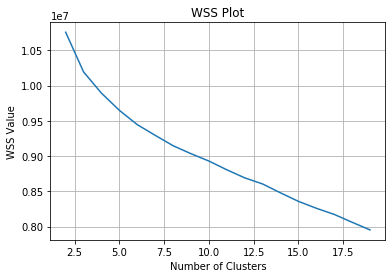

In [16]:
plt.plot(range(2,20), wss_clust_data)
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

In [17]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(clust_data_scaled)
k_means.inertia_

9445234.19104924

In [18]:
final_cluster=k_means.fit(clust_data_scaled)
final_cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [19]:
labels_clust_data = k_means.labels_

In [20]:
clust_data['cluster']=labels_clust_data

In [21]:
clust['cluster']=labels_clust_data

In [22]:
clust_data

,ID,genres,titles,cities,segment,dow,tod,prime_time,prime_day,prefered_genre,...,8,7,6,5,3,4,mean_genre_time,mean_title_time,mean_city_time,cluster
0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",21,4,Cricket,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1184.666667,394.777778,1778.000000,1
1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2,7,Drama,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,13939.500000,2534.000000,41827.500000,4
2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",9,5,Drama,...,0.683766,1.714519,6.375017,0.000000,0.00000,0.0,4899.666667,1729.117647,29400.000000,5
3,train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083",16,2,Cricket,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1360.666667,1360.666667,1360.666667,1
4,train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6",22,1,TalkShow,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,8529.000000,8529.000000,2842.666667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175215,train-126324,"Cricket:3787,Reality:57","Local Boy Jadhav Shines with 120:134,India Fin...","khanna:2295,mumbai:1548",neg,"1:1108,5:40,4:220,7:2472","13:1108,15:17,17:209,22:40,16:11,19:128,21:2327",21,7,Cricket,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1922.000000,225.705882,1921.500000,1
175216,train-126327,"Cricket:5060,Awards:21,Crime:1872","Savdhaan India:1872,Watch: England Fall of Wic...","lisboa:3756,porto:3198",neg,"1:948,5:2317,7:3688","13:1708,15:279,14:1,17:601,19:154,1:948,3:184,...",21,7,Cricket,...,0.000000,0.000000,0.000000,0.000000,2.64672,0.0,2317.666667,695.100000,3477.000000,1
175217,train-126326,"Drama:25428,Family:7","Potol Kumar Gaanwala:1,Kusum Dola:25426,Mem Bo...",kolkata:25436,neg,"1:2562,3:3153,2:5009,5:3875,4:4274,7:3284,6:3278","10:1237,13:968,12:1296,20:1120,14:4654,17:1595...",14,2,Drama,...,0.000000,7.945744,15.687045,6.054649,0.00000,0.0,12717.500000,6358.750000,25436.000000,5
175218,train-126329,"Drama:50749,Romance:9","Nadaan Parinde:0,Phillauri:9,Yeh Rishta Kya Ke...","chennai:7999,delhi:8945,ahmedabad:33811",neg,"1:11880,3:7673,2:17472,5:2759,4:5122,7:4836,6:...","10:1,13:9913,12:226,20:1837,14:5666,17:3892,16...",13,2,Drama,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,25379.000000,10151.200000,16918.333333,5


In [23]:
clust_detail = clust.groupby('cluster').mean()
clust_detail = clust_detail.reset_index()
clust_detail

,cluster,prime_time,prime_day,Drama,Cricket,Others,Family,Crime,Romance,Action,...,9,8,7,6,5,3,4,mean_genre_time,mean_title_time,mean_city_time
0,0,2.214200,4.052254,19.280737,12.118622,0.411349,6.520847,4.418472,13.498150,4.964989,...,0.979978,0.885809,1.034131,1.536430,3.556768,6.084711,3.952682,6072.936282,3089.359510,11608.091118
1,1,18.807304,4.393421,14.288757,43.150681,0.480363,5.311791,2.279229,8.713714,3.298484,...,0.814093,0.689293,0.552276,0.318776,0.153154,0.132563,0.100715,3130.861875,1435.273680,6068.286562
2,2,13.737513,4.251151,27.662015,5.833102,0.035799,13.867304,3.338597,28.028187,0.980899,...,3.369356,2.571660,1.905593,1.301463,0.850116,1.347011,0.879311,46243.434443,15744.509426,111578.936515
3,3,20.503382,4.155147,17.330856,30.209738,0.450410,6.543674,3.219436,11.391880,3.971395,...,0.961431,1.238592,4.866512,3.105160,0.391592,0.319128,0.226938,4016.821020,1865.402693,7834.795308
4,4,16.927542,4.889556,10.261186,59.892478,0.255225,3.455802,1.929517,6.171623,2.712283,...,2.510861,1.411639,1.073160,0.667241,0.339507,0.398931,0.272459,7800.862582,1529.078046,16714.301292
5,5,12.657618,4.058666,20.273583,24.513349,0.530899,8.071471,3.240735,13.699507,4.000375,...,6.175785,4.414123,1.101776,0.421149,0.192575,0.154051,0.120951,4341.757230,1965.286593,8144.966566


In [24]:
clust_data.groupby('cluster').count()['prime_time']

cluster
0    17549
1    49944
2     5646
3    24248
4    34144
5    43688
Name: prime_time, dtype: int64

In [25]:
clust_detail.to_csv('cluster.csv')

In [26]:
clust_data.to_excel('data_with_clustering.xlsx')

# clustering without genre

In [88]:
clust_data

,ID,genres,titles,cities,segment,dow,tod,prime_time,prime_day,prefered_genre,...,no_pgm_watched,total_watch_time,watch_pattern,morning_watch,evening_watch,night_watch,watch_frequency,no_genre_watched,variance_in_genre,cluster
0,train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320",21.0,4.0,Cricket,...,9.0,3554.0,evening,0.000000,100.000000,0.000000,Medium watcher,3.0,1.363711,4
1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",2.0,7.0,Drama,...,33.0,83635.0,evening,27.425121,38.543672,34.031207,Daily watcher,6.0,1.182060,0
2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",9.0,5.0,Drama,...,17.0,29396.0,morning,39.706082,37.474486,22.819431,Daily watcher,6.0,1.518227,0
3,train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083",16.0,2.0,Cricket,...,3.0,4082.0,evening,48.971093,51.028907,0.000000,Medium watcher,3.0,1.310867,4
4,train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6",22.0,1.0,TalkShow,...,1.0,8528.0,night,0.000000,35.881801,64.118199,Medium watcher,1.0,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175215,train-126324,"Cricket:3787,Reality:57","Local Boy Jadhav Shines with 120:134,India Fin...","khanna:2295,mumbai:1548",neg,"1:1108,5:40,4:220,7:2472","13:1108,15:17,17:209,22:40,16:11,19:128,21:2327",21.0,7.0,Cricket,...,17.0,3840.0,evening,29.296875,69.661458,1.041667,Frequent watcher,2.0,0.970343,4
175216,train-126327,"Cricket:5060,Awards:21,Crime:1872","Savdhaan India:1872,Watch: England Fall of Wic...","lisboa:3756,porto:3198",neg,"1:948,5:2317,7:3688","13:1708,15:279,14:1,17:601,19:154,1:948,3:184,...",21.0,7.0,Cricket,...,10.0,6952.0,evening,28.596087,49.036249,22.367664,Medium watcher,3.0,0.897955,4
175217,train-126326,"Drama:25428,Family:7","Potol Kumar Gaanwala:1,Kusum Dola:25426,Mem Bo...",kolkata:25436,neg,"1:2562,3:3153,2:5009,5:3875,4:4274,7:3284,6:3278","10:1237,13:968,12:1296,20:1120,14:4654,17:1595...",14.0,2.0,Drama,...,4.0,25435.0,morning,38.553175,26.864557,34.582269,Daily watcher,2.0,0.999450,0
175218,train-126329,"Drama:50749,Romance:9","Nadaan Parinde:0,Phillauri:9,Yeh Rishta Kya Ke...","chennai:7999,delhi:8945,ahmedabad:33811",neg,"1:11880,3:7673,2:17472,5:2759,4:5122,7:4836,6:...","10:1,13:9913,12:226,20:1837,14:5666,17:3892,16...",13.0,2.0,Drama,...,5.0,50754.0,evening,37.965481,40.089451,21.945068,Daily watcher,2.0,0.999645,0


In [89]:
clust1=clust_data.copy()

In [90]:
clust1=clust1.drop(['ID','genres','titles','cities','segment','tod','dow','gen','Drama','Cricket','Others','Family','Crime','Romance','Action','Comedy','LiveTV','TalkShow','Reality','Thriller','Sport','Kids','Mythology','cluster','prefered_genre','most_watched_pgm','%time_prefered_genre'],axis=1)

In [91]:
clust1

,prime_time,prime_day,no_place_presence,%watched_base_loc,%watched_fav_pgm,no_pgm_watched,total_watch_time,watch_pattern,morning_watch,evening_watch,night_watch,watch_frequency,no_genre_watched,variance_in_genre
0,21.0,4.0,2.0,98.200225,82.240360,9.0,3554.0,evening,0.000000,100.000000,0.000000,Medium watcher,3.0,1.363711
1,2.0,7.0,2.0,67.737732,50.893306,33.0,83635.0,evening,27.425121,38.543672,34.031207,Daily watcher,6.0,1.182060
2,9.0,5.0,1.0,100.000000,70.984861,17.0,29396.0,morning,39.706082,37.474486,22.819431,Daily watcher,6.0,1.518227
3,16.0,2.0,3.0,98.113670,95.124939,3.0,4082.0,evening,48.971093,51.028907,0.000000,Medium watcher,3.0,1.310867
4,22.0,1.0,3.0,60.213415,100.000000,1.0,8528.0,night,0.000000,35.881801,64.118199,Medium watcher,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175215,21.0,7.0,2.0,59.718970,41.907740,17.0,3840.0,evening,29.296875,69.661458,1.041667,Frequent watcher,2.0,0.970343
175216,21.0,7.0,2.0,54.012079,50.841606,10.0,6952.0,evening,28.596087,49.036249,22.367664,Medium watcher,3.0,0.897955
175217,14.0,2.0,1.0,100.000000,99.964616,4.0,25435.0,morning,38.553175,26.864557,34.582269,Daily watcher,2.0,0.999450
175218,13.0,2.0,3.0,66.616097,97.521475,5.0,50754.0,evening,37.965481,40.089451,21.945068,Daily watcher,2.0,0.999645


In [93]:
clust1_data_dummy=pd.get_dummies(clust1,drop_first=True)
clust1_data_dummy

,prime_time,prime_day,no_place_presence,%watched_base_loc,%watched_fav_pgm,no_pgm_watched,total_watch_time,morning_watch,evening_watch,night_watch,no_genre_watched,variance_in_genre,watch_pattern_morning,watch_pattern_night,watch_frequency_Frequent watcher,watch_frequency_Medium watcher
0,21.0,4.0,2.0,98.200225,82.240360,9.0,3554.0,0.000000,100.000000,0.000000,3.0,1.363711,0,0,0,1
1,2.0,7.0,2.0,67.737732,50.893306,33.0,83635.0,27.425121,38.543672,34.031207,6.0,1.182060,0,0,0,0
2,9.0,5.0,1.0,100.000000,70.984861,17.0,29396.0,39.706082,37.474486,22.819431,6.0,1.518227,1,0,0,0
3,16.0,2.0,3.0,98.113670,95.124939,3.0,4082.0,48.971093,51.028907,0.000000,3.0,1.310867,0,0,0,1
4,22.0,1.0,3.0,60.213415,100.000000,1.0,8528.0,0.000000,35.881801,64.118199,1.0,0.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175215,21.0,7.0,2.0,59.718970,41.907740,17.0,3840.0,29.296875,69.661458,1.041667,2.0,0.970343,0,0,1,0
175216,21.0,7.0,2.0,54.012079,50.841606,10.0,6952.0,28.596087,49.036249,22.367664,3.0,0.897955,0,0,0,1
175217,14.0,2.0,1.0,100.000000,99.964616,4.0,25435.0,38.553175,26.864557,34.582269,2.0,0.999450,1,0,0,0
175218,13.0,2.0,3.0,66.616097,97.521475,5.0,50754.0,37.965481,40.089451,21.945068,2.0,0.999645,0,0,0,0


In [94]:
data3_scaled = pd.DataFrame(StandardScaler().fit_transform(clust1_data_dummy),columns=clust1_data_dummy.columns)
data3_scaled.head()

,prime_time,prime_day,no_place_presence,%watched_base_loc,%watched_fav_pgm,no_pgm_watched,total_watch_time,morning_watch,evening_watch,night_watch,no_genre_watched,variance_in_genre,watch_pattern_morning,watch_pattern_night,watch_frequency_Frequent watcher,watch_frequency_Medium watcher
0,0.877923,-0.165137,-0.023523,0.648298,0.910726,-0.246279,-0.420930,-1.058948,1.934226,-0.903319,-0.268568,0.735184,-0.701500,-0.595642,-0.771665,1.400904
1,-2.057322,1.314115,-0.023523,-0.990631,-0.248037,1.173227,1.224627,-0.166634,-0.053080,0.224037,1.157958,0.404632,-0.701500,-0.595642,-0.771665,-0.713825
2,-0.975916,0.327947,-0.813407,0.745129,0.494660,0.226889,0.110088,0.232943,-0.087654,-0.147377,1.157958,1.016361,1.425517,-0.595642,-0.771665,-0.713825
3,0.105490,-1.151305,0.766362,0.643641,1.387013,-0.601156,-0.410081,0.534393,0.350653,-0.903319,-0.268568,0.639025,-0.701500,-0.595642,-0.771665,1.400904
4,1.032410,-1.644389,0.766362,-1.395451,1.567223,-0.719448,-0.318721,-1.058948,-0.139157,1.220734,-1.219586,-1.746387,-0.701500,1.678860,-0.771665,1.400904


In [95]:
wss3 =[]

In [96]:
for i in range(2,10): #we are mentioning the range which the value of 'i' should take
    KM = KMeans(n_clusters=i,random_state=1) #we are defining the number of clusters which is the same as 'i'
    KM.fit(data3_scaled) #we are applying the 'fit' function to form the required number of clusters in the dataset
    wss3.append(KM.inertia_) 

In [97]:
for i in range(2,10):
    print('The WSS value for',i,'clusters is',wss3[i-2])

The WSS value for 2 clusters is 2389558.099071666
The WSS value for 3 clusters is 2034656.5301316092
The WSS value for 4 clusters is 1783574.362413277
The WSS value for 5 clusters is 1645525.3916966706
The WSS value for 6 clusters is 1539105.9683963542
The WSS value for 7 clusters is 1441366.3165367888
The WSS value for 8 clusters is 1372047.5585085582
The WSS value for 9 clusters is 1314559.4187064378


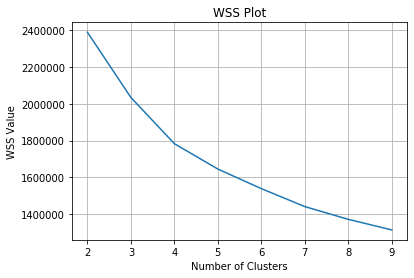

In [98]:
plt.plot(range(2,10), wss3)
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

In [99]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(data3_scaled)
k_means.inertia_

1783574.362413277

In [100]:
clust3=k_means.fit(data3_scaled)
clust3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [101]:
labels3 = k_means.labels_

In [102]:
clust_data['clust']=labels3

In [103]:
clust1['clust']=labels3

In [104]:
d3_clust = clust1.groupby('clust').mean()
d3_clust = d3_clust.reset_index()
d3_clust

,clust,prime_time,prime_day,no_place_presence,%watched_base_loc,%watched_fav_pgm,no_pgm_watched,total_watch_time,morning_watch,evening_watch,night_watch,no_genre_watched,variance_in_genre
0,0,16.060431,4.699451,3.300927,73.376105,32.761020,36.241284,72195.327564,36.402805,40.664951,22.932244,6.185486,1.466553
1,1,18.642738,4.460145,1.676904,89.815260,60.940606,8.179613,10373.548830,13.064658,75.332470,11.602872,2.873538,0.876800
2,2,12.939089,4.119935,1.799593,88.487216,65.069331,7.998456,16711.276221,11.054278,15.936190,73.009531,3.117680,0.832060
3,3,12.770496,4.117227,1.793166,88.358970,64.022533,7.972905,14200.028277,73.414942,17.604595,8.980462,3.007162,0.825172


In [105]:
clust_data.groupby('clust').count()['prime_time']

clust
0    31722
1    57045
2    40797
3    45655
Name: prime_time, dtype: int64

In [126]:
d3_clust.to_csv("cluster_without_genre.csv")

In [127]:
clust_data.to_csv("data_with_cluster.csv")